<a href="https://colab.research.google.com/github/urvesh2012/MLTSA25_UBhagat/blob/main/HW3/HW3_UBhagat_ARIMA_instructions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import pylab as pl
import glob
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import statsmodels.api as sm
from pandas.plotting import scatter_matrix
import json
import os

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
pl.style.use("https://raw.githubusercontent.com/fedhere/MLTSA_FBianco/master/fbb.mplstyle")

TASK 1: data ingestion

TASK 2: data exploration

TASK 3: test each time series for stationarity

TASK 4: Inspect the partial autocorrelation with plots

TASK 5: fit an ARIMA model to each time series with appriopriate parameters

# REMEMBER: CAPTIONS FOR EVERY PLOT!!!

#  TASK 1: data ingestion

In [5]:
# download kaggle economic data
# https://www.kaggle.com/borismarjanovic/price-volume-data-for-all-us-stocks-etfs/data#a.us.txt


In [6]:
!pip install kaggle

In [7]:
from google.colab import drive

drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [8]:
cd /content

/content


In [9]:
ls

gdrive/  sample_data/


In [10]:
cd /content/gdrive/MyDrive/.Kaggle

/content/gdrive/MyDrive/.Kaggle


In [11]:
ls

kaggle.json


In [12]:
ls kaggle.json


kaggle.json


In [13]:

envs = json.load(open("kaggle.json", "r"))
os.environ["KAGGLE_USERNAME"] = envs['username']
os.environ["KAGGLE_KEY"] = envs['key']


## now make a director to save the MLTSA 2025 data into - call it MLTSA25

In [14]:
!mkdir /content/gdrive/MyDrive/MLTSA25

mkdir: cannot create directory ‘/content/gdrive/MyDrive/MLTSA25’: File exists


In [15]:
cd /content/gdrive/MyDrive/MLTSA25

/content/gdrive/MyDrive/MLTSA25


## make a HW3 folder

In [16]:
!mkdir HW3

mkdir: cannot create directory ‘HW3’: File exists


In [17]:
cd HW3

/content/gdrive/MyDrive/MLTSA25/HW3


## download the kaggle data _note: you may need to go to the specificl challenge and agree to the terms of competition_

In [18]:
!kaggle datasets download borismarjanovic/price-volume-data-for-all-us-stocks-etfs

Dataset URL: https://www.kaggle.com/datasets/borismarjanovic/price-volume-data-for-all-us-stocks-etfs
License(s): CC0-1.0
price-volume-data-for-all-us-stocks-etfs.zip: Skipping, found more recently modified local copy (use --force to force download)


In [19]:
!ls

Data  ETFs  price-volume-data-for-all-us-stocks-etfs.zip  Stocks


## uncompress the file

In [20]:
!unzip price-volume-data-for-all-us-stocks-etfs.zip

Archive:  price-volume-data-for-all-us-stocks-etfs.zip
replace Data/ETFs/aadr.us.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [22]:
# use glob to sort the files alphabetically
alltss = []

allfiles = np.sort(np.array(glob.glob("Data/Stocks/*.txt")))
tss = pd.read_csv(allfiles[0])[["Date", "Close"]].rename({"Close":
              allfiles[0].replace(".txt",
                                  "").replace("Data/Stocks/",
                                              "")}, axis=1)
for f in allfiles[1:11]:
    print(f)
    name = f.replace(".txt","").replace("Data/Stocks/", "")

    tss = tss.merge(pd.read_csv(f)[["Date", "Close"]].rename({"Close":
                                                              name},
                                        axis=1), on="Date")
tss.set_index("Date", inplace=True)


Data/Stocks/aa.us.txt
Data/Stocks/aaap.us.txt
Data/Stocks/aaba.us.txt
Data/Stocks/aac.us.txt
Data/Stocks/aal.us.txt
Data/Stocks/aamc.us.txt
Data/Stocks/aame.us.txt
Data/Stocks/aan.us.txt
Data/Stocks/aaoi.us.txt
Data/Stocks/aaon.us.txt


Now you have a dataframe with 10 columns of data and two years of measurements

# TASK 2:  data exploration

- inspect the files by, e.g., printing some content and printing their statistical properties
- plot each time series (ts)
- inspect correlation

In [23]:
# inspect the file
tss.head()

a.us   aa.us  aaap.us  aaba.us  aac.us  aal.us  aamc.us  \
Date                                                                    
2015-11-11  36.901  17.779    24.50    33.38   22.56  43.524    20.75   
2015-11-12  36.734  17.206    25.00    33.23   22.50  43.044    19.17   
2015-11-13  36.030  17.581    25.26    32.19   22.68  42.603    17.50   
2015-11-16  36.577  18.242    25.02    32.94   22.58  41.994    15.58   
2015-11-17  37.607  18.197    24.62    32.86   22.52  41.473    12.59   

            aame.us  aan.us  aaoi.us  aaon.us  
Date                                           
2015-11-11   4.7960  24.649    16.76   24.252  
2015-11-12   4.8951  24.182    16.11   23.652  
2015-11-13   4.6672  23.795    16.60   23.110  
2015-11-16   4.8455  23.923    16.93   23.130  
2015-11-17   4.9150  23.418    16.68   23.268

In [24]:
tss.tail()

a.us  aa.us  aaap.us  aaba.us  aac.us  aal.us  aamc.us  aame.us  \
Date                                                                           
2017-11-02  68.13  47.46    81.00    70.51   10.02  47.257    88.00     3.65   
2017-11-03  68.37  47.12    80.99    70.23   10.08  47.346    80.40     3.60   
2017-11-07  68.25  46.97    81.00    72.22   11.07  46.358    81.00     3.40   
2017-11-09  67.47  43.33    81.00    70.19   10.88  45.670    84.05     3.50   
2017-11-10  66.81  43.01    80.98    70.56   11.28  45.820    80.10     3.50   

            aan.us  aaoi.us  aaon.us  
Date                                  
2017-11-02   35.80    39.28    34.35  
2017-11-03   36.43    37.82    34.45  
2017-11-07   34.44    37.89    34.60  
2017-11-09   35.62    43.20    33.35  
2017-11-10   36.59    45.30    33.80

In [25]:
tss.describe()

a.us       aa.us     aaap.us     aaba.us      aac.us      aal.us  \
count  447.000000  447.000000  447.000000  447.000000  447.000000  447.000000   
mean    48.787649   28.434510   36.750649   44.218737   13.871387   41.942794   
std      9.034588    8.818682   10.642928   10.756682    6.071919    6.066181   
min     34.193000   14.831000   23.720000   26.760000    6.050000   24.916000   
25%     41.239500   20.950000   29.720000   36.660000    8.040000   37.982500   
50%     46.228000   28.080000   35.020000   42.080000   11.400000   42.059000   
75%     55.956500   34.595000   38.525000   49.640000   19.600000   46.530000   
max     68.370000   50.080000   81.000000   72.220000   24.720000   53.992000   

          aamc.us     aame.us      aan.us     aaoi.us     aaon.us  
count  447.000000  447.000000  447.000000  447.000000  447.000000  
mean    45.783325    3.875367   29.626879   33.240678   30.040465  
std     31.608792    0.432411    7.248519   22.352541    5.021530  
min     11.340000    3.100000   20.203000    8.800000   19.267000  
25%     15.555000    3.562000   23.769500   16.065000   26.463500  
50%     33.650000    3.800000   26.839000   22.870000   30.253000  
75%     76.250000    4.129100   34.966000   52.645000   34.314000  
max    109.350000    4.944600   46.248000   99.610000   38.100000

<Axes: xlabel='Date'>

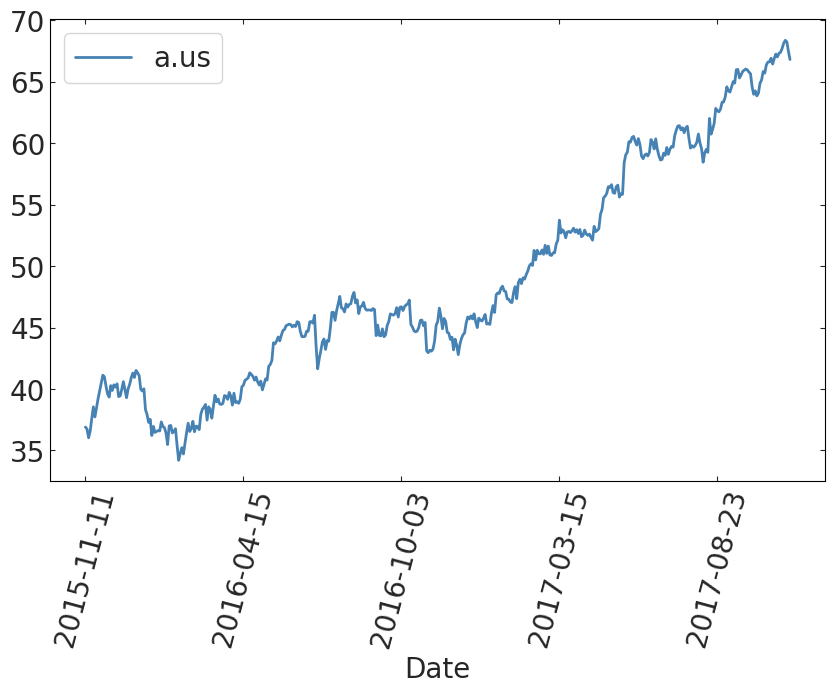

In [26]:
# plot all 10, for example in a for loop
# example of one plot - there are other ways to do it of course!
tss.plot(y="a.us", rot=75, lw=2)



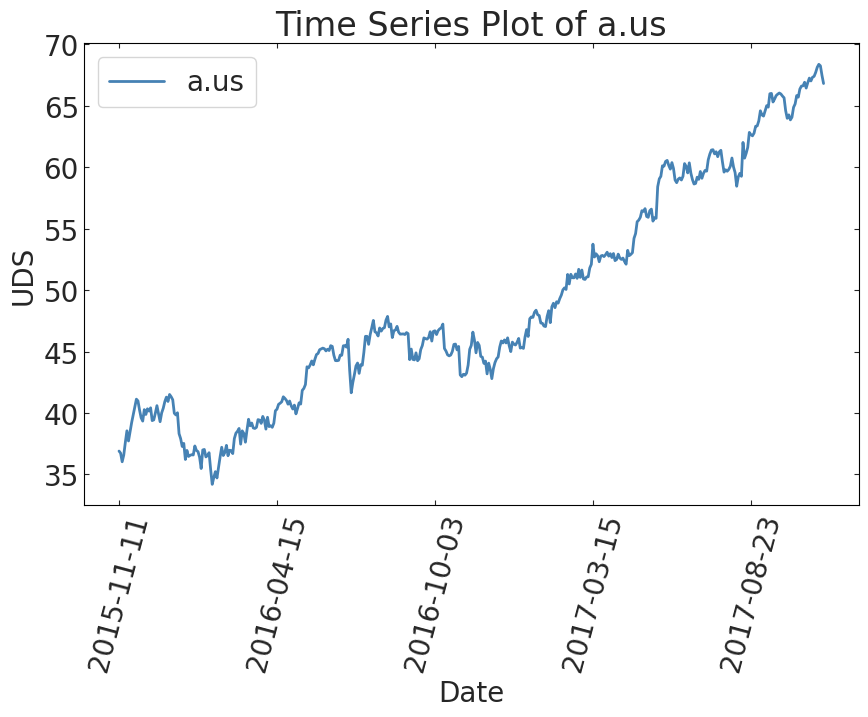

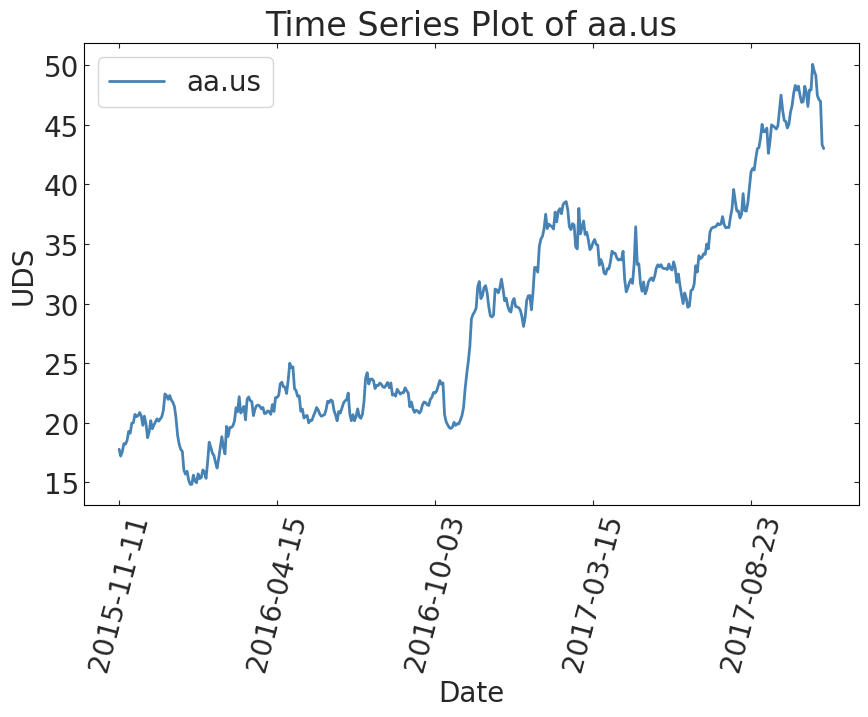

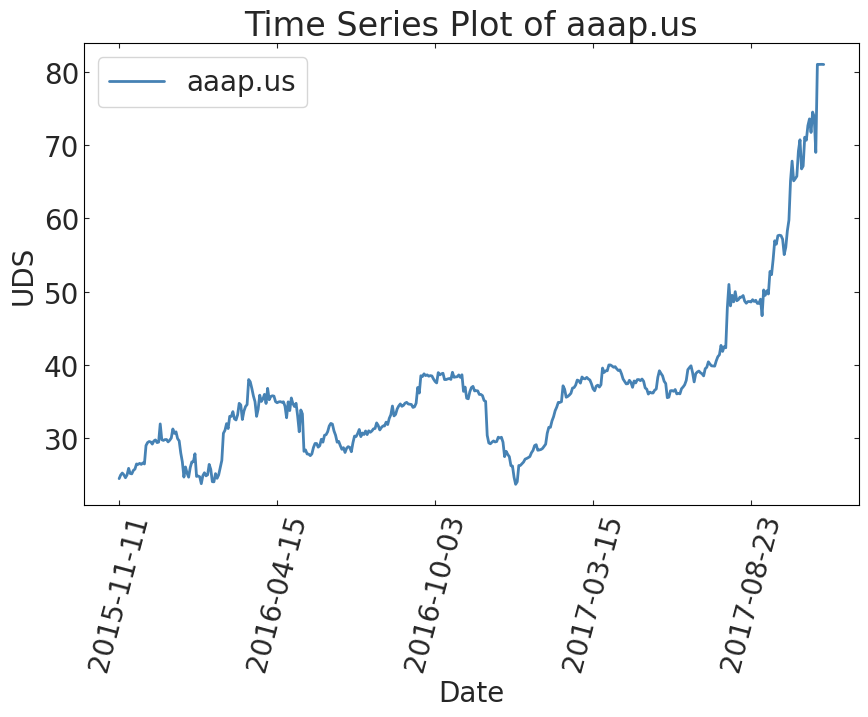

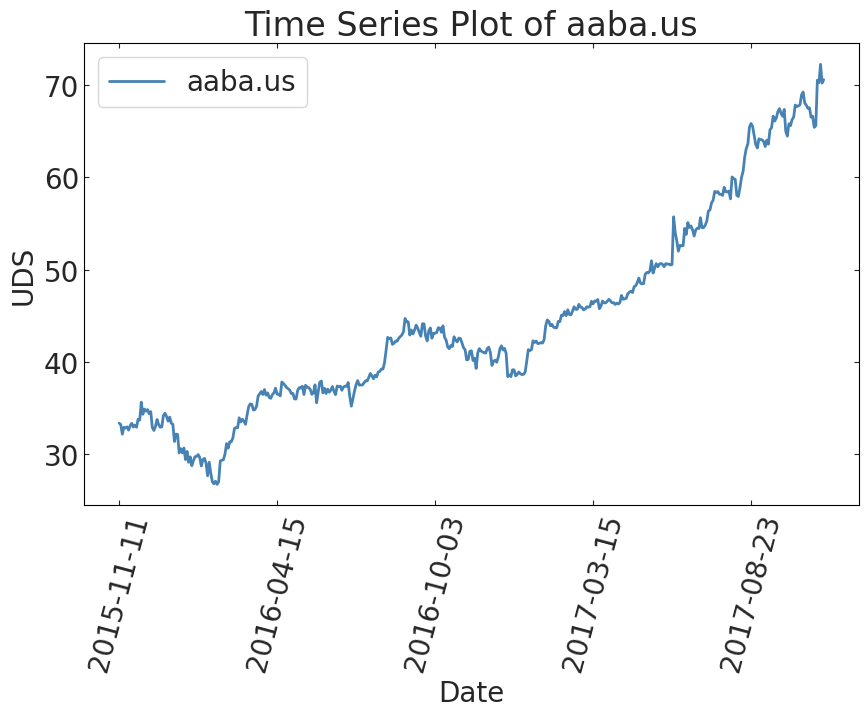

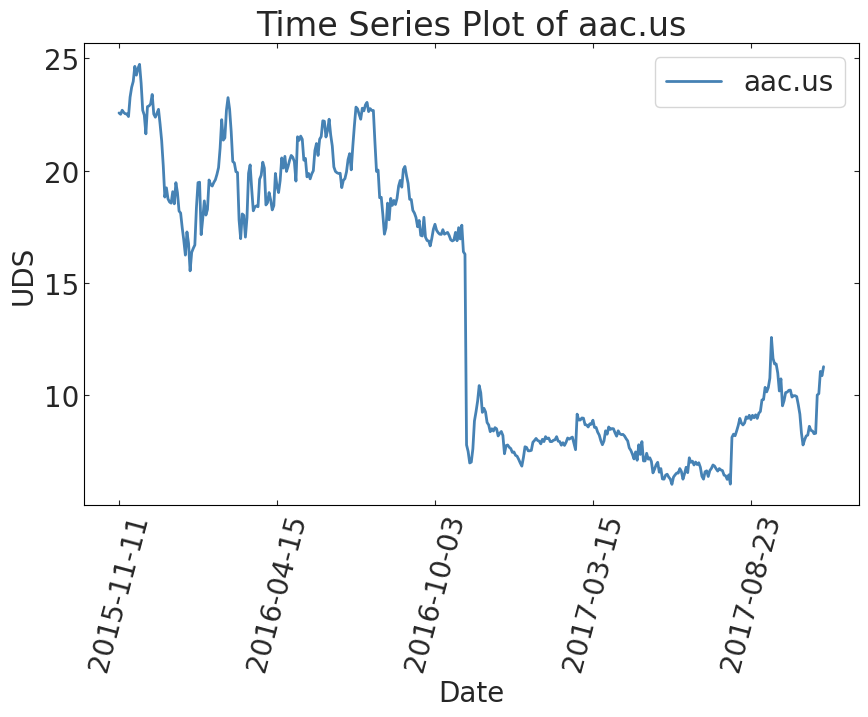

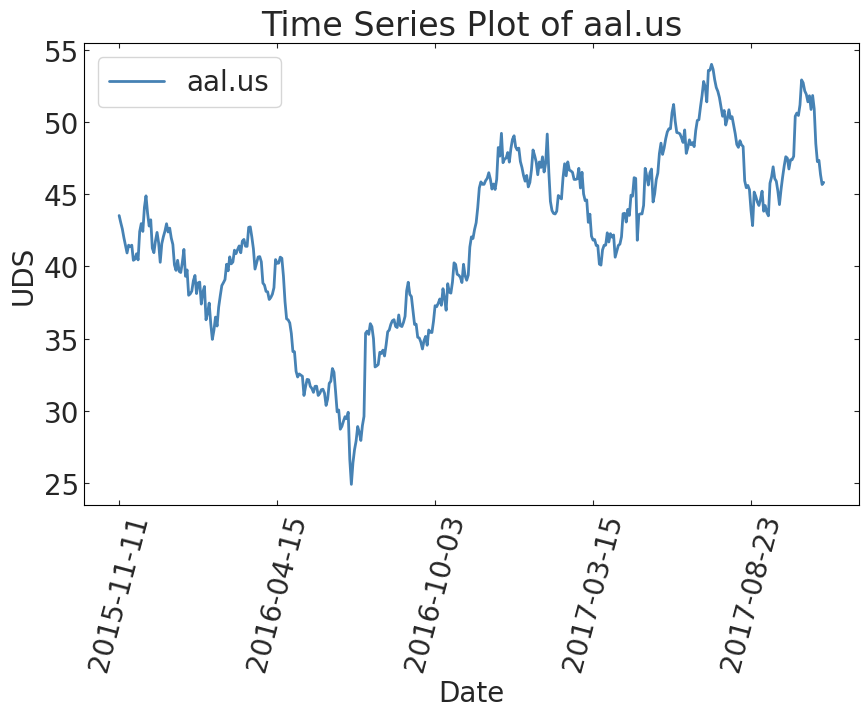

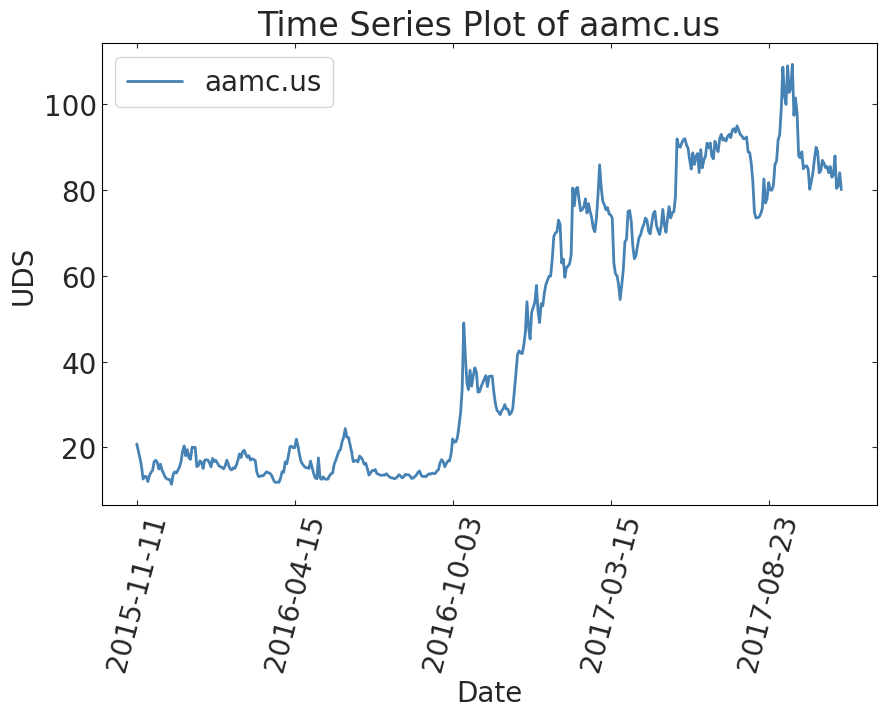

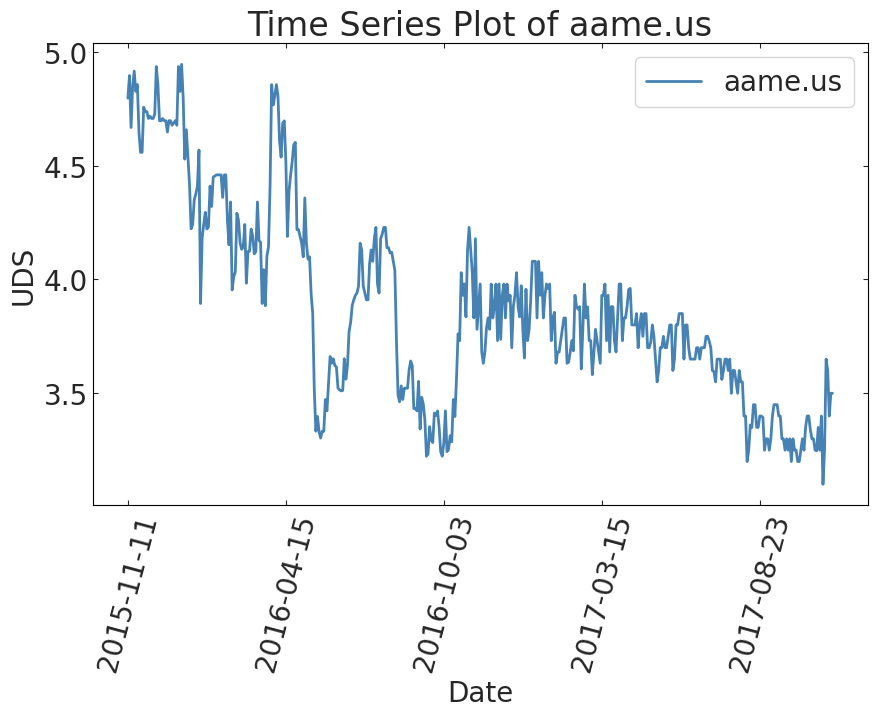

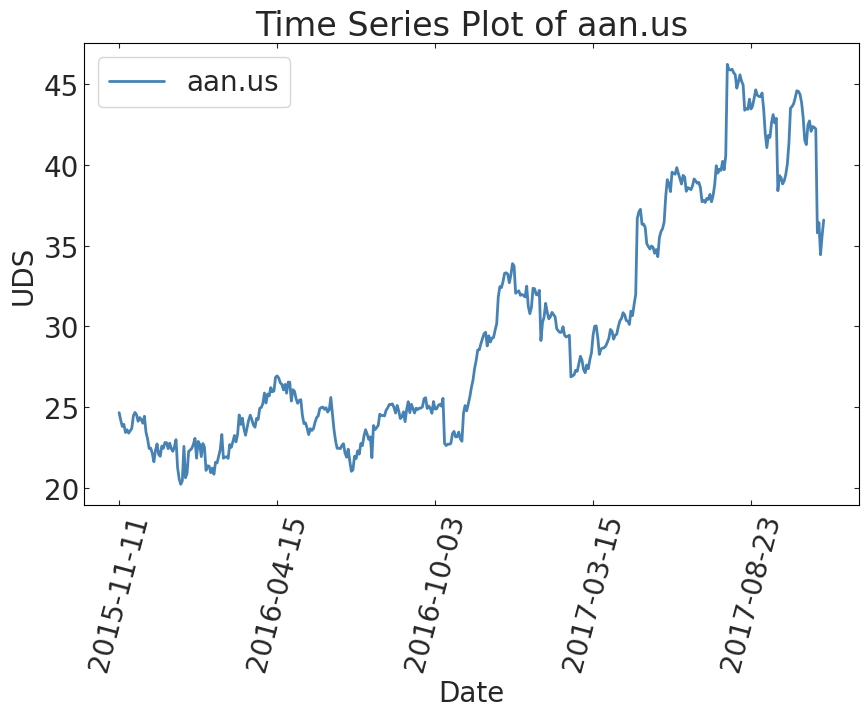

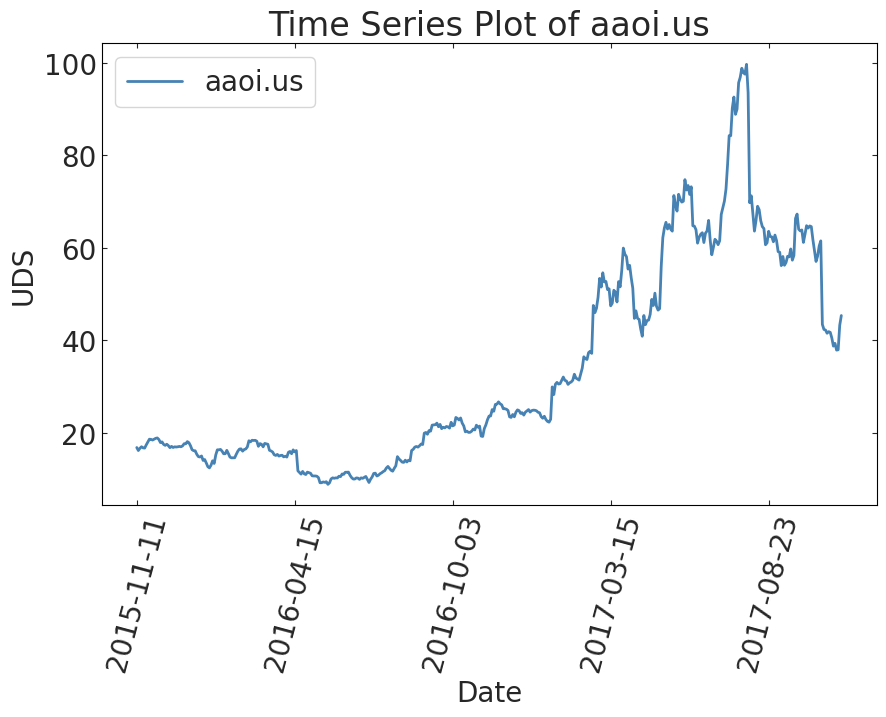

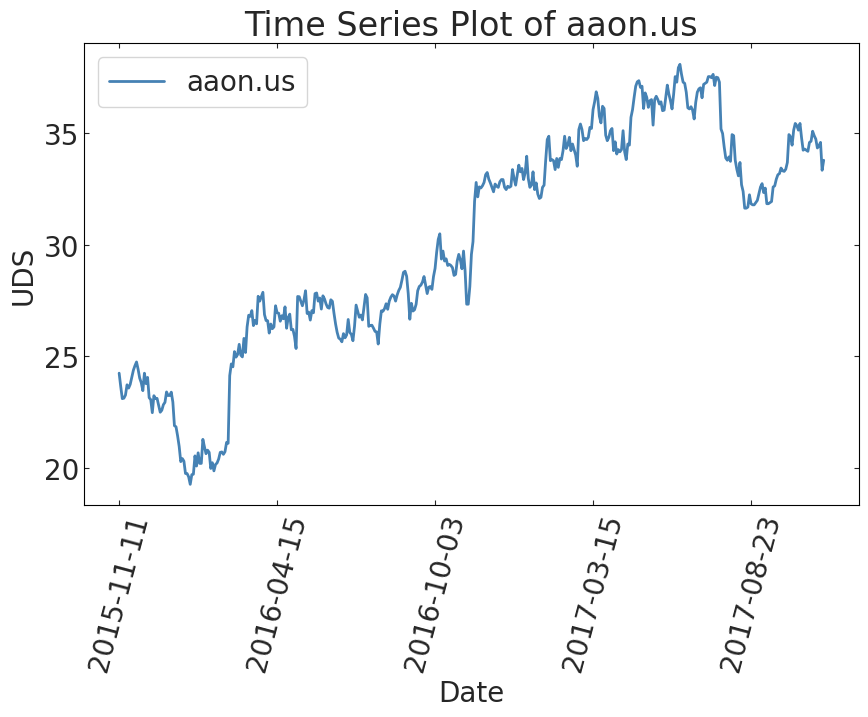

In [36]:
for c in tss.columns:
    tss.plot(y=c, rot=75, lw=2)
    plt.xlabel("Date")
    plt.ylabel("UDS")
    plt.title(f"Time Series Plot of {c}")

Fig 1: WRITE A CAPTION! describe what, how, and WOW!

What?
> This is time series plot showing the trend of 10 different stocks over time.
> x-axis represents date range between Nov 2015 to Aug 2017.
> y-axis represents Numerical values like stock prices.

How?
> The plot is simple line chart with a blue line representing the data points.
> The x-axis labels are rotated (about 75 degrees) for better readability.
> For all graphs, line is smooth and continuos, indicating a squential progression over time.
> A legend is present, indicating name of stock.
> The line width is slightly thicker than the default (lw=2), making the trend stand out.

WOW!
> For most of the stocks, plots shows a clear upward trend, suggesting growth over time.
> For aac.us and aame.us, it is showing downward trend. So invester of these two stacks are in loss.
> aal.us shows sideway trend, so no major loss or profit for that stack.

### visualizing correlations

use ```pandas.plotting.scatter_matrix```  to look at the relationship between lightcurves

plot the pairwise correlation as a heatmap using ```pl.imshow()```. You can access the pairwise correlation with the dataframe method ```df.corr()```

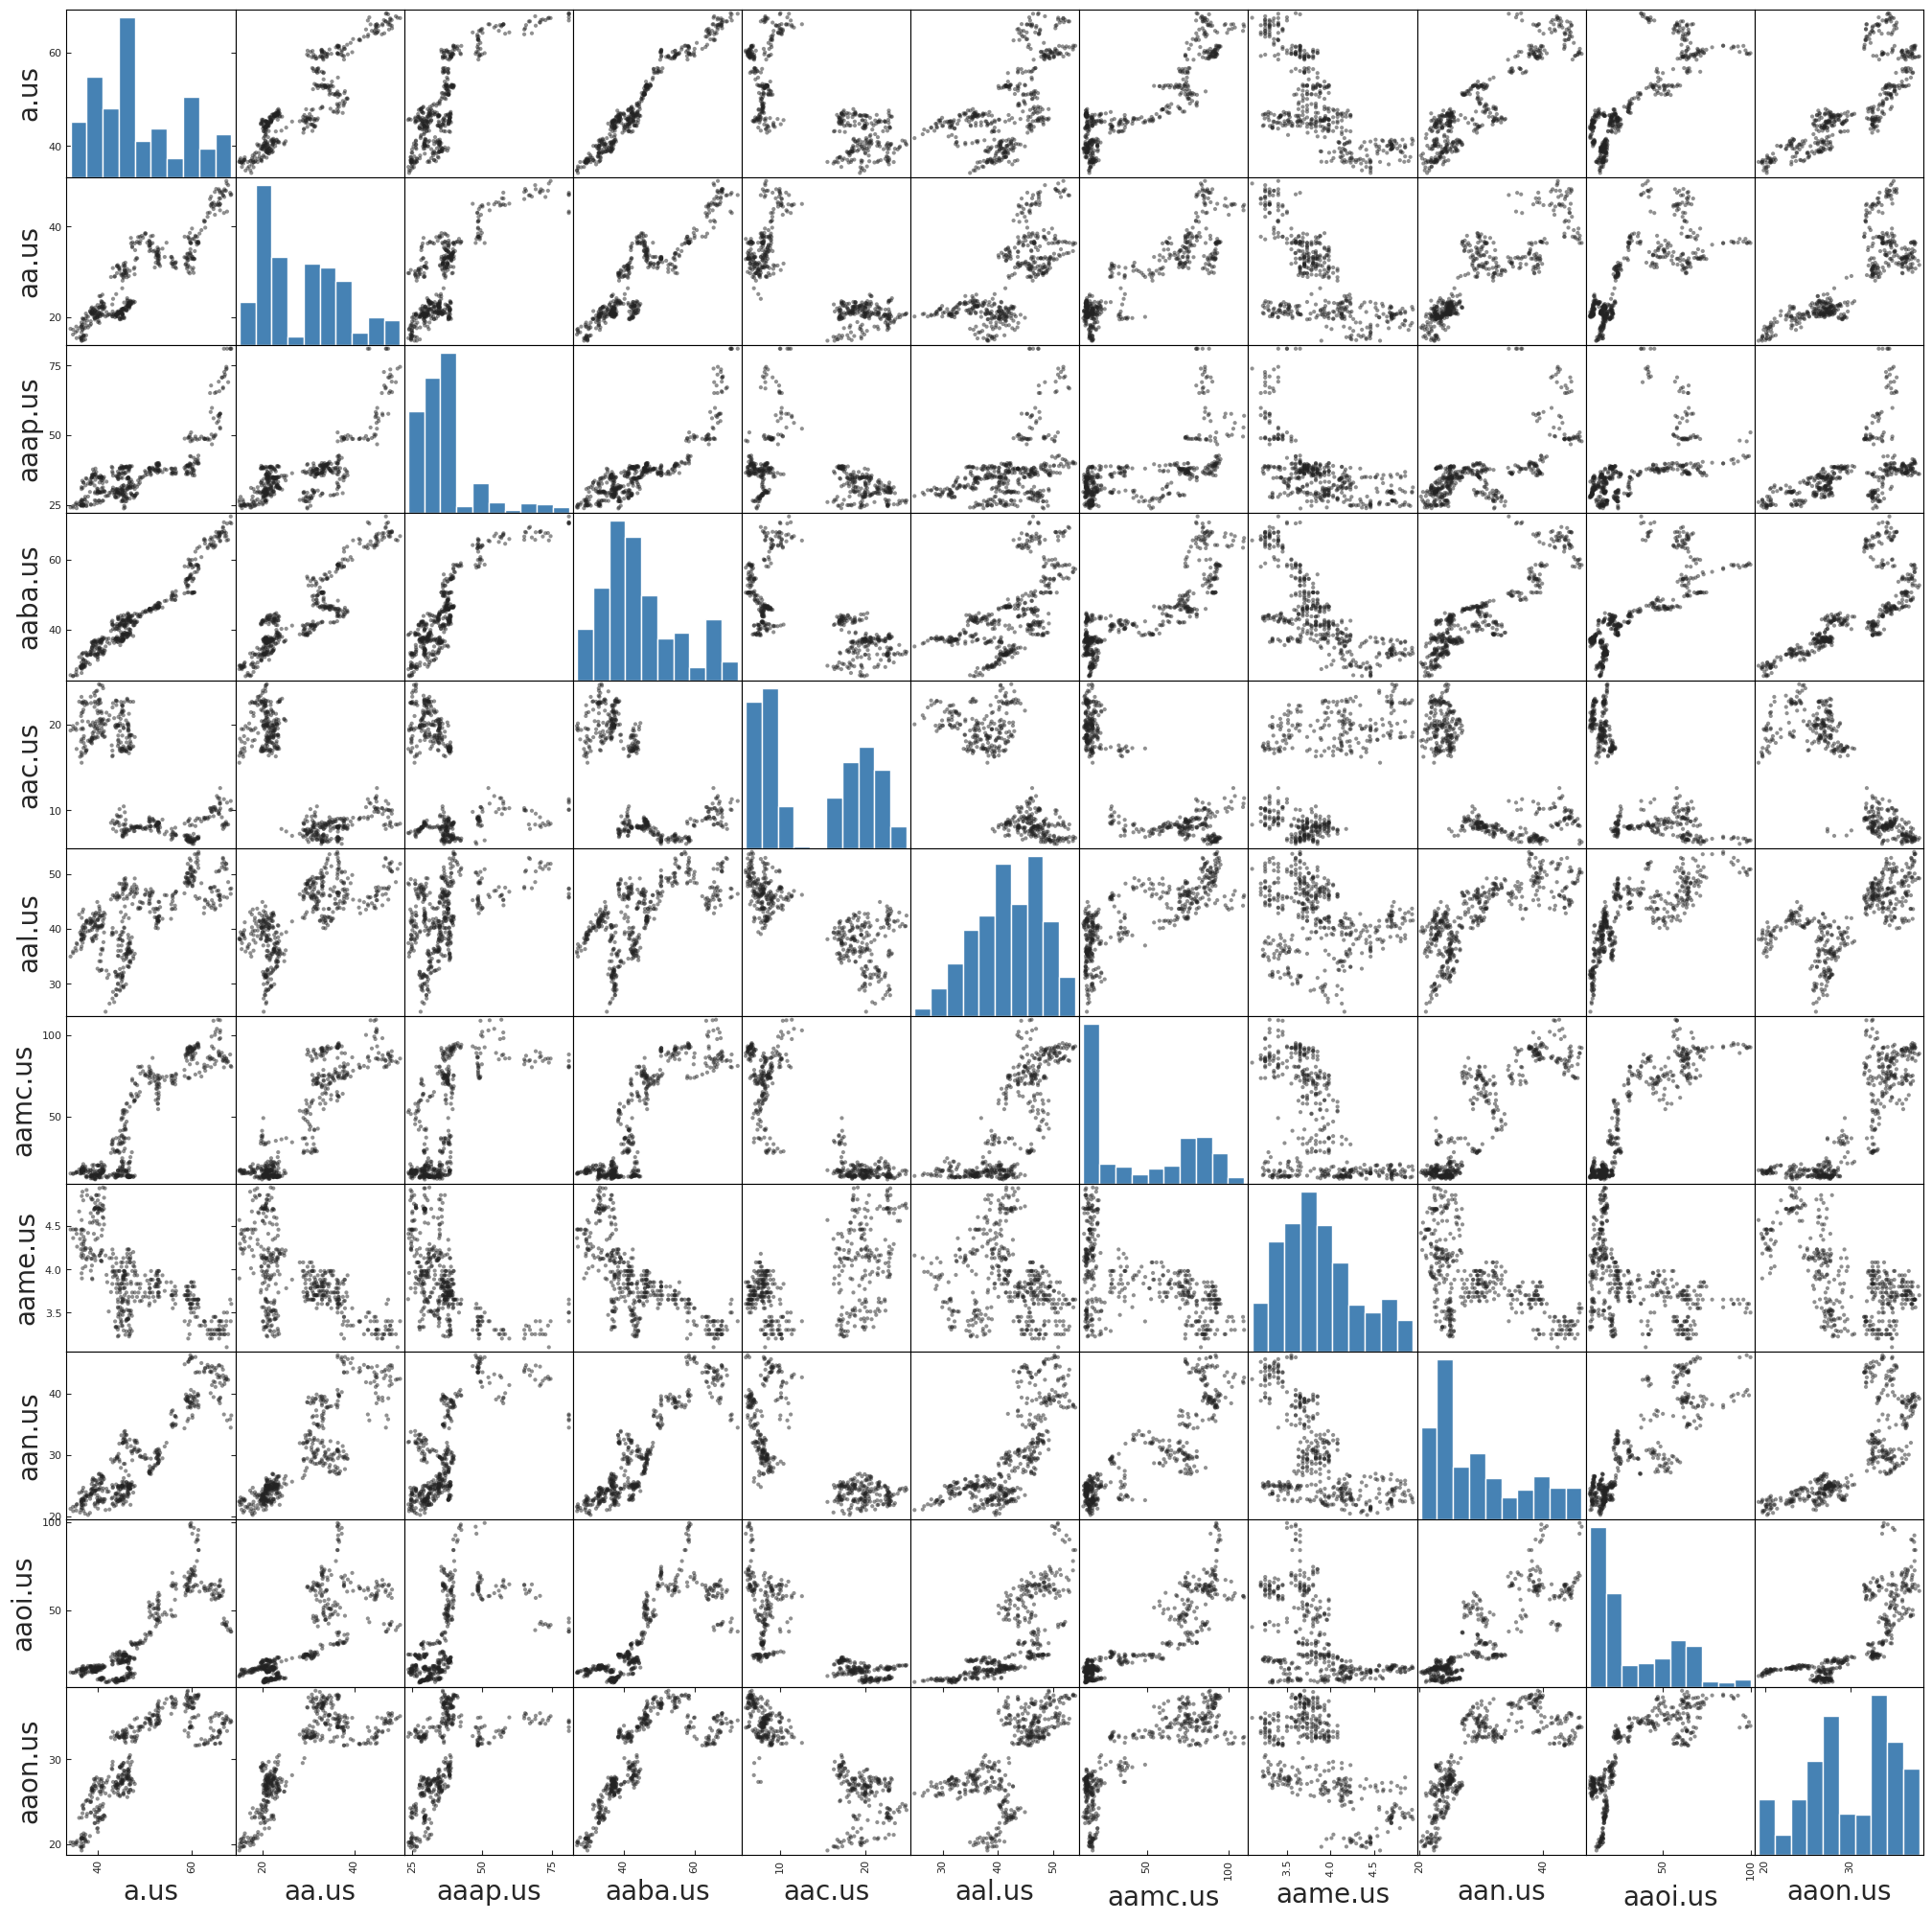

In [28]:
scatter_matrix(tss, figsize=(25,25), color="#222222");

Fig 2: WRITE A CAPTION

What?
>This is a scatter matrix plot that visualizes pairwise relationships between multiple numerical variables in the dataset tss.
>The x-axis and y-axis labels represent different variables (stocks), such as a.us, aa.us, aapl.us, aaba.us, etc.
>The diagonal contains histograms of individual variables, showing their distributions.

How?
>The scatter matrix is displayed as a grid of scatter plots, where each subplot represents the relationship between two different variables.
>The diagonal subplots contain histograms of the respective variable, showing how its values are distributed.
>The scatter plots use black dots (color="#222222"), making the relationships visible against a white background.
>The figure is quite large (figsize=(25,25)) to accommodate multiple variables, ensuring clarity.

Wow!
>The scatter plots reveal potential correlations between different stocks or financial metrics.
>Some pairs show strong linear relationships, suggesting high correlation, while others appear scattered, indicating weak or no correlation.
>The histograms on the diagonal help in understanding the distribution of individual variables, such as skewness or normality.

In [29]:
print("Correlation matrix of 2015-2017 stock values")
tss.corr()

Correlation matrix of 2015-2017 stock values


a.us     aa.us   aaap.us   aaba.us    aac.us    aal.us   aamc.us  \
a.us     1.000000  0.902139  0.800310  0.973457 -0.721867  0.621041  0.897263   
aa.us    0.902139  1.000000  0.776600  0.904210 -0.791137  0.713229  0.893952   
aaap.us  0.800310  0.776600  1.000000  0.872134 -0.423021  0.451520  0.621329   
aaba.us  0.973457  0.904210  0.872134  1.000000 -0.670578  0.612989  0.849972   
aac.us  -0.721867 -0.791137 -0.423021 -0.670578  1.000000 -0.785248 -0.868936   
aal.us   0.621041  0.713229  0.451520  0.612989 -0.785248  1.000000  0.780517   
aamc.us  0.897263  0.893952  0.621329  0.849972 -0.868936  0.780517  1.000000   
aame.us -0.699609 -0.606774 -0.573976 -0.709023  0.510986 -0.219258 -0.544740   
aan.us   0.905395  0.873520  0.696179  0.903785 -0.765267  0.756808  0.881631   
aaoi.us  0.851239  0.766459  0.560427  0.809059 -0.780147  0.746505  0.904166   
aaon.us  0.809409  0.809966  0.503524  0.755263 -0.876358  0.671816  0.853182   

          aame.us    aan.us   aaoi.us   aaon.us  
a.us    -0.699609  0.905395  0.851239  0.809409  
aa.us   -0.606774  0.873520  0.766459  0.809966  
aaap.us -0.573976  0.696179  0.560427  0.503524  
aaba.us -0.709023  0.903785  0.809059  0.755263  
aac.us   0.510986 -0.765267 -0.780147 -0.876358  
aal.us  -0.219258  0.756808  0.746505  0.671816  
aamc.us -0.544740  0.881631  0.904166  0.853182  
aame.us  1.000000 -0.585002 -0.496371 -0.612453  
aan.us  -0.585002  1.000000  0.860847  0.765596  
aaoi.us -0.496371  0.860847  1.000000  0.780400  
aaon.us -0.612453  0.765596  0.780400  1.000000

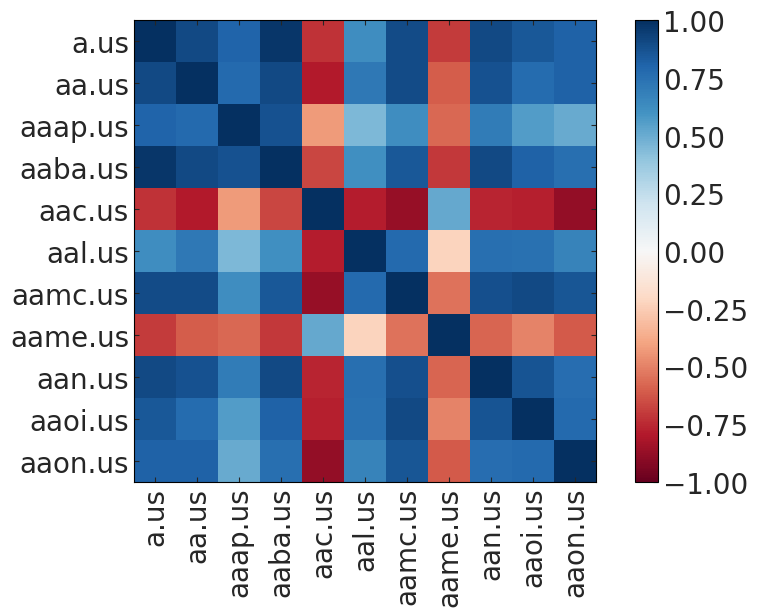

In [30]:
#Show the correlation as a heatmap
pl.imshow(tss.corr(),clim=(-1,1), cmap="RdBu");
pl.xticks(range(len(tss.columns)), tss.columns, rotation=90);
pl.yticks(range(len(tss.columns)), tss.columns);
pl.colorbar();

Fig 3: WRITE A CAPTION

What?
>This is a correlation heatmap, which helps visualize how different stocks are related to each other. Each row and column represent a stock (like a.us, aa.us, aap.us, etc.), and the colors indicate the strength of their relationship.
>Dark blue means a strong positive correlation (these stocks tend to move together).
>Dark red means a strong negative correlation (when one goes up, the other tends to go down).
>Lighter colors mean little to no correlation.

How?
>The correlation values were calculated using tss.corr(), which checks how each stock's price movements compare to others.
>plt.imshow() was used to create the heatmap, with a red-to-blue (RdBu) color scale.
>The labels on the x- and y-axis show the stocks, and we rotated them for better readability.
>The color bar on the right helps interpret the values.

Wow!
>If two stocks are deep blue, they tend to follow similar trends—potentially stocks from the same industry, like a.us and aa.us.
>If you see dark red areas, those stocks tend to move in opposite directions. That might be useful for diversifying a portfolio, like aamc.us and aac.us.
>This is also helpful for machine learning—if two stocks are too similar, we might not need both in a predictive model.

# TASK 3: test each time series for stationarity

## this will allow you to choose the parameter i in the ARIMA model: `i=0` for stationary time series, `i=1` for non stationary time series

The AD fuller test implementation which we saw in class is here
https://github.com/fedhere/MLTSA_FBianco/blob/main/CodeExamples/ARMA/testingARMA_ARIMA.ipynb

## testing for stationarity
test if each of these time series is stationary using the AD fuller test using `statsmodels.api.tsa.stattools.adfuller()`

```
for f in tss.columns:
    sm.tsa.stattools.adfuller(tss[c])
```

Have the code automatically print a statement about wheather the ts is stationary for each ts (for example in a for loop).

In [31]:
threshold = 0.05
print ("Stationarity results from the AD Fuller test at a p-value of 0.05")
for c in tss.columns:

    print(c, "is stationary:", sm.tsa.stattools.adfuller(tss[c])[1]<threshold) # use the ADfuller test that we tried in class - that notebook is here  https://github.com/fedhere/MLTSA_FBianco/blob/main/CodeExamples/ARMA/testingARMA_ARIMA.ipynb

Stationarity results from the AD Fuller test at a p-value of 0.05
a.us is stationary: False
aa.us is stationary: False
aaap.us is stationary: False
aaba.us is stationary: False
aac.us is stationary: False
aal.us is stationary: False
aamc.us is stationary: False
aame.us is stationary: True
aan.us is stationary: False
aaoi.us is stationary: False
aaon.us is stationary: False


NOTE: keep track of which time series is stationary and which one is not - when you model with ARIMA you can set the second parameter to 0 if it is stationary

# TASK 4: Inspect the partial autocorrelation with plots -
## this will help you choose the value of the parameter p in the ARIMA model: `p=N` where N is the largest statistically significant lag in the partial autocorrelation


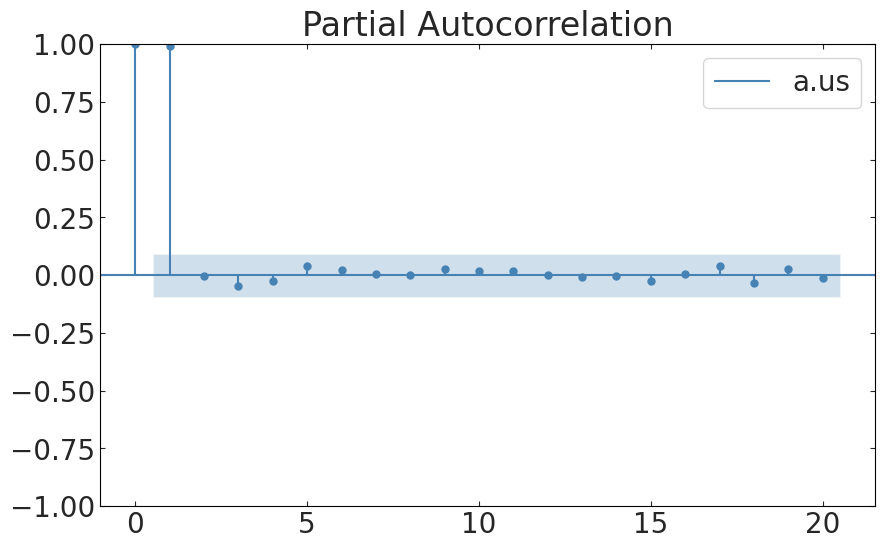

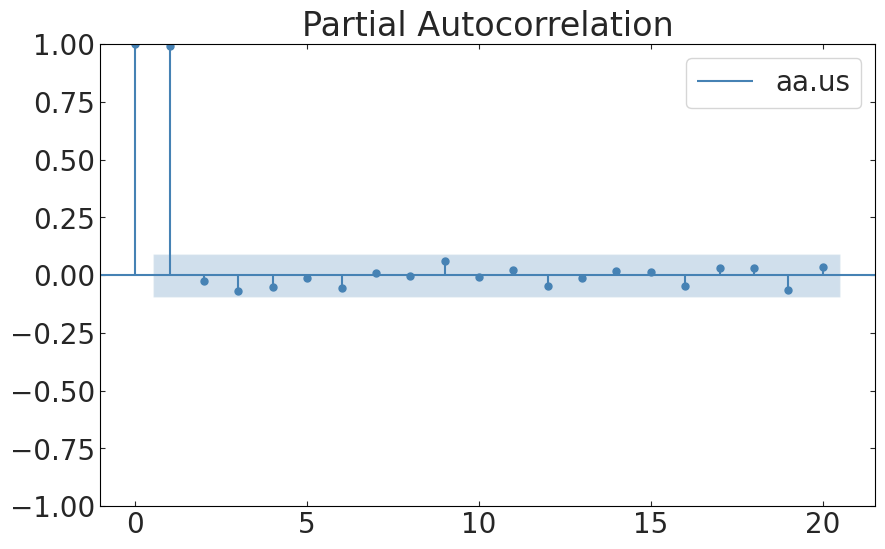

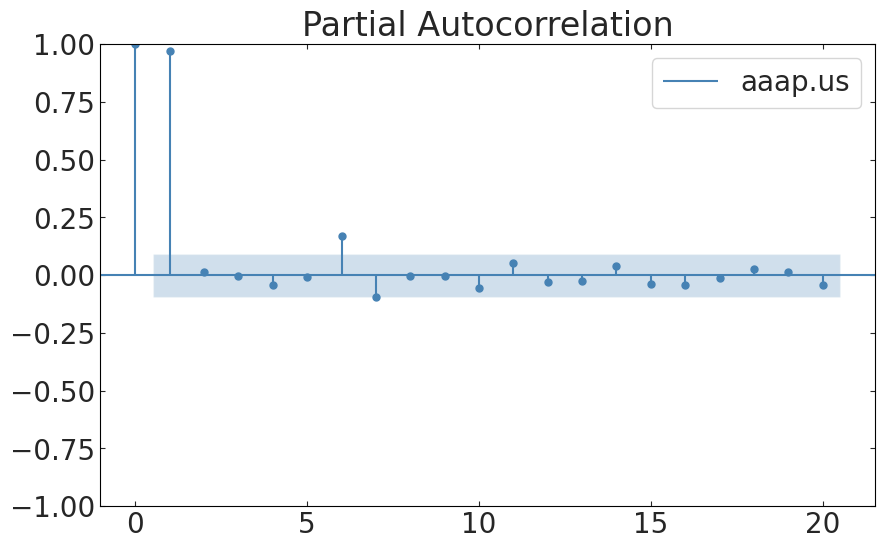

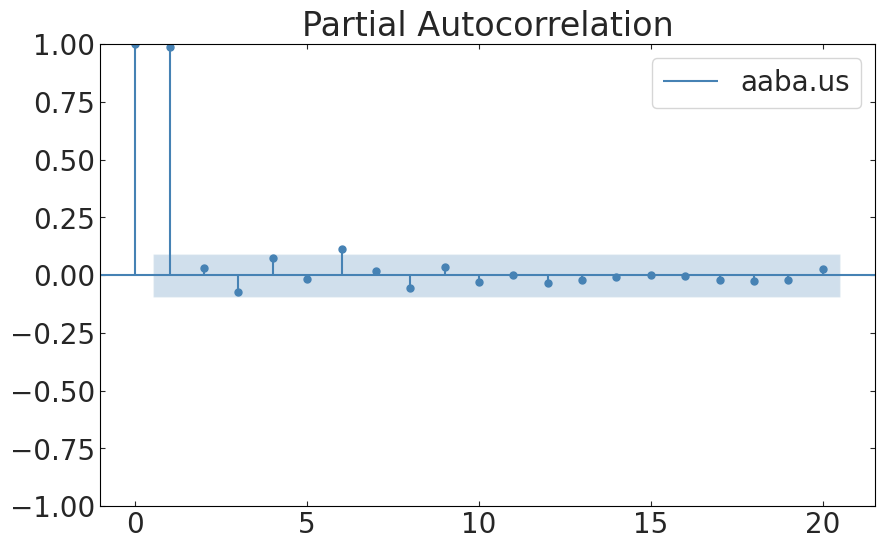

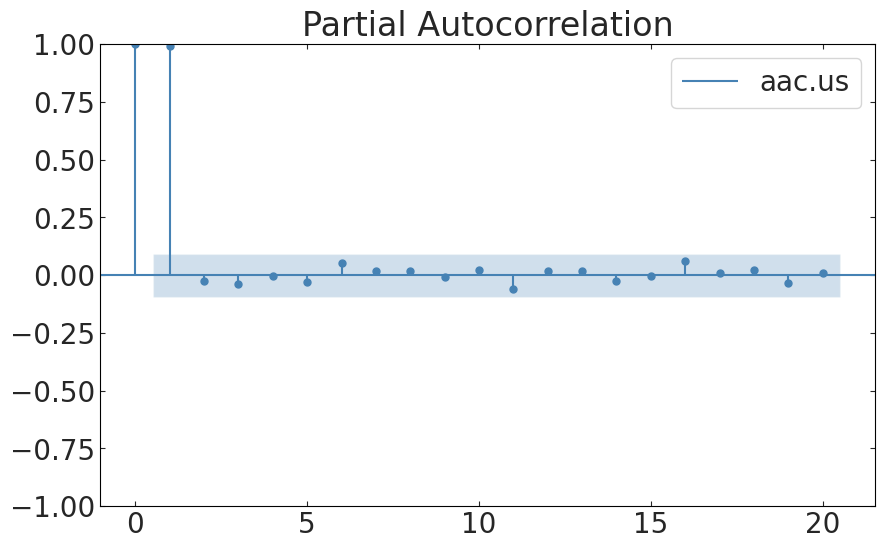

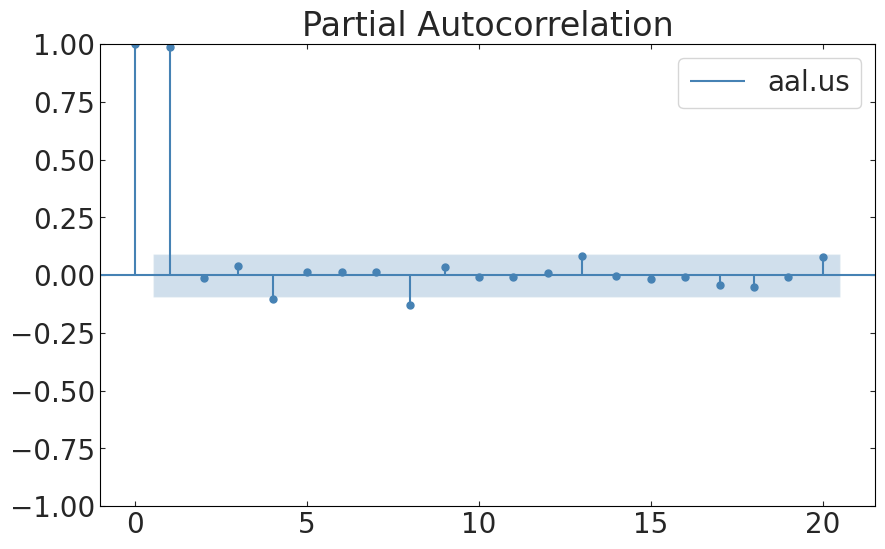

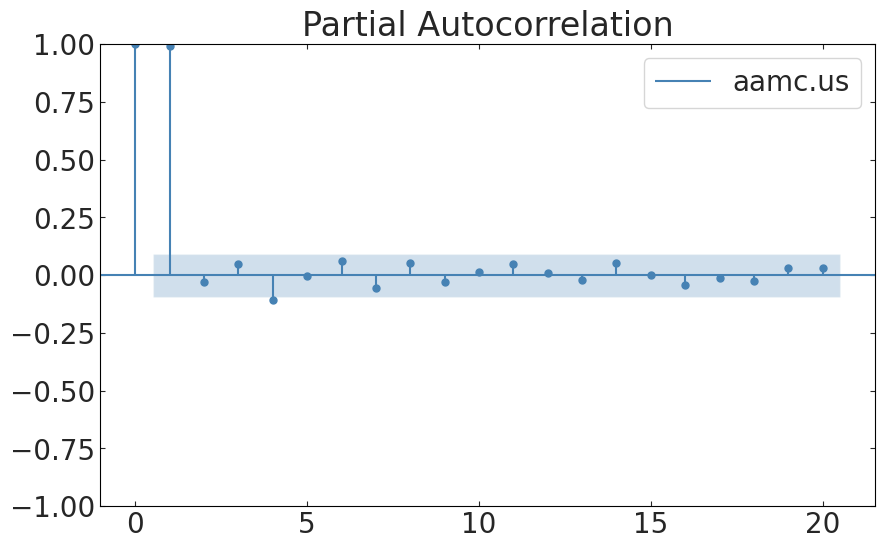

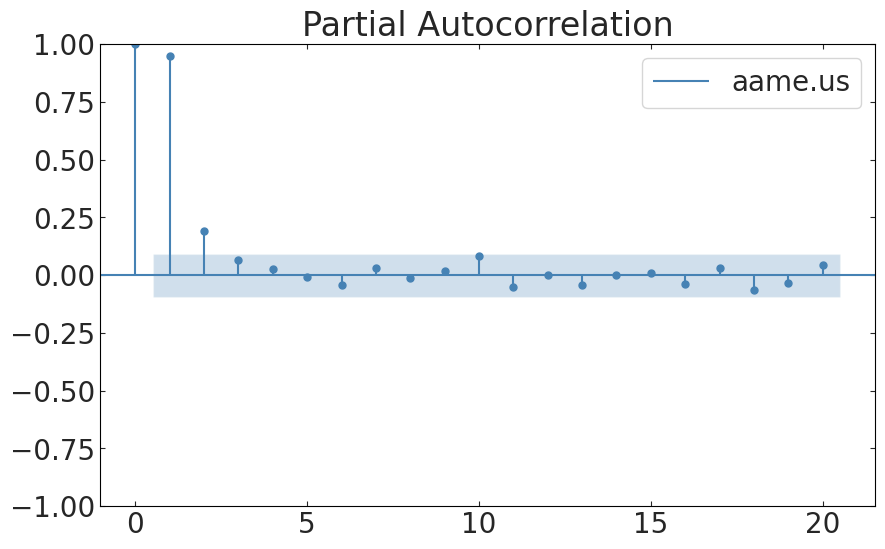

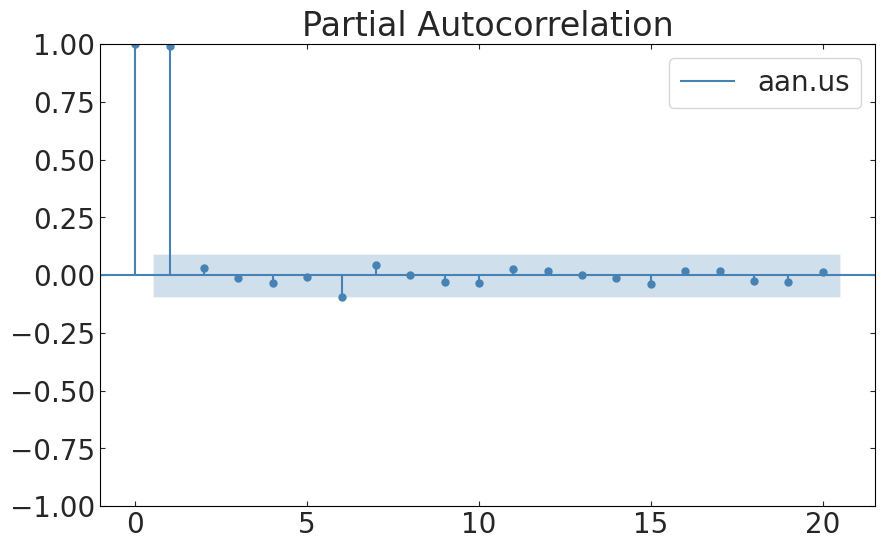

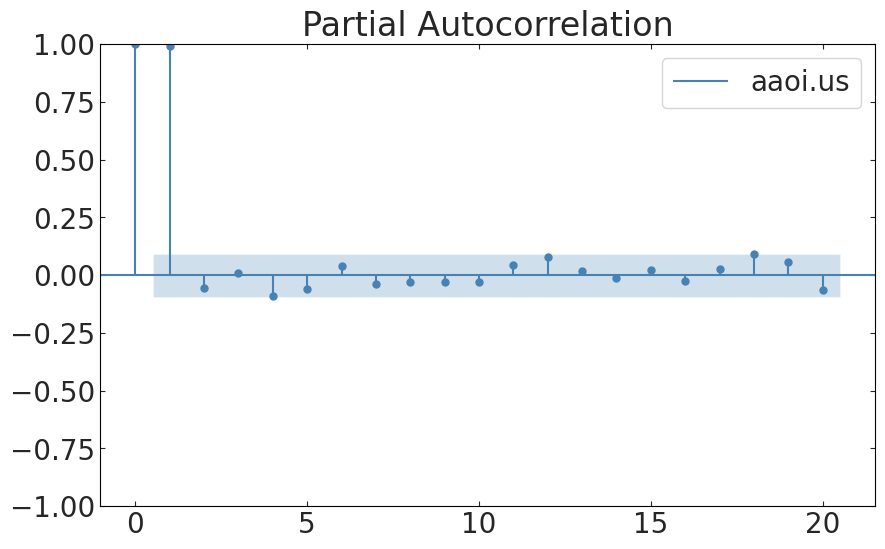

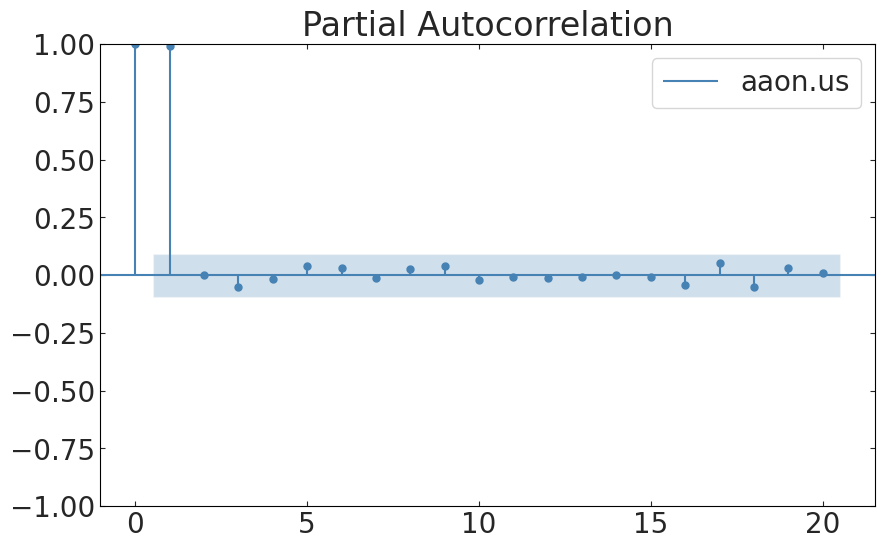

In [32]:
#partial autocorrelatin plot
for c in tss.columns:
    sm.graphics.tsa.plot_pacf(tss[c], lags=20);
    pl.legend(labels=[c])
# sm.graphics.tsa.plot_pacf(tss["aal.us"], lags=20);

FIG 4: WRITE A CAPTION (for each time series make a figure)

What?
>This is a Partial Autocorrelation Function (PACF) plot, which helps in identifying the appropriate lag order (p) for an ARIMA model.
>The x-axis represents the lag values, while the y-axis represents the partial autocorrelation coefficients.
>The blue vertical bars indicate the strength of correlation at each lag.

How?
>The plot is structured with lags on the x-axis and the correlation values on the y-axis.
>The blue dots mark individual values, while the shaded blue region represents the confidence interval (typically 95%).
>Lags whose bars extend beyond the confidence interval are considered statistically significant.

Wow?
>for all time series, the first lag have high partial autocorrelation, meaning there’s a strong correlation at lag 1. We are ignoring lag at x=0 as it shows correlation with itself.
>After the first lag, the values drop within the confidence interval, indicating that lags beyond 1 are not significantly contributing to the model.
>This suggests that an AR(1) model (AutoRegressive model with one lags) might be a good choice for this dataset.
>For aame.us,the second lag being just outside the confidence interval might not be strong enough to justify increasing the model complexity beyond AR(1).
>Identifying the correct p value is crucial in ARIMA modeling, and this plot provides clear evidence supporting an AR(1) structure.

# TASK 5: fit an ARIMA model to each time series
- look here for how to use the statsmodels ARIMA function https://www.geeksforgeeks.org/arma-time-series-model/
- the ARIMA function has 3 parameters: (p,i,q) see slide https://slides.com/d/EfsBk3o/live#/12; choose the values of _p_ according to your pacf plot and _i_ according to your stationarity analysis. _q_ is harder to guess... pick whatever you want for now

For each time series, use the all but the last 60 points for training and show the prediction based on the last 60 points



In [50]:
# to run the model for 1 column:
arma_models = []
model_fit = []

for c in tss.columns:
    N_test = 60
    p = 1
    if c == "aame.us":
      i=0
    else:
      i = 1
    q = 3

    print(c)
    arma_models.append(sm.tsa.ARIMA(tss.iloc[:-60][c], order=(p, i, q)))
    model_fit.append(arma_models[-1].fit())
    print(model_fit[-1].summary())

a.us
                               SARIMAX Results                                
Dep. Variable:                   a.us   No. Observations:                  387
Model:                 ARIMA(1, 1, 3)   Log Likelihood                -361.580
Date:                Mon, 03 Mar 2025   AIC                            733.161
Time:                        23:00:05   BIC                            752.940
Sample:                             0   HQIC                           741.004
                                - 387                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6588      0.223     -2.953      0.003      -1.096      -0.222
ma.L1          0.5917      0.224      2.638      0.008       0.152       1.031
ma.L2         -0.0314      0.063     -0.496    

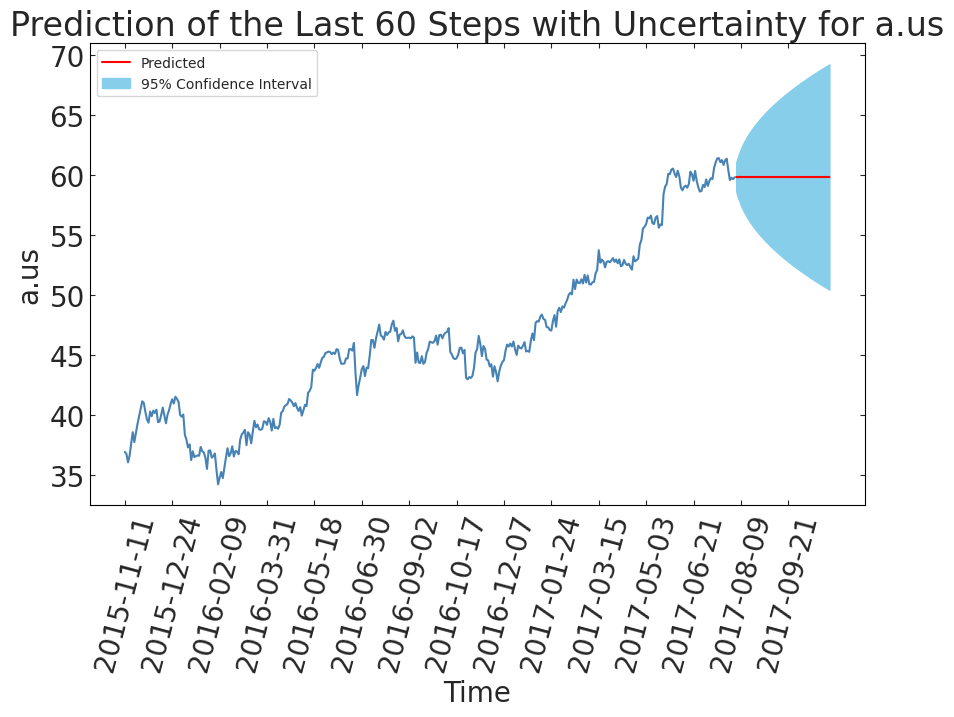

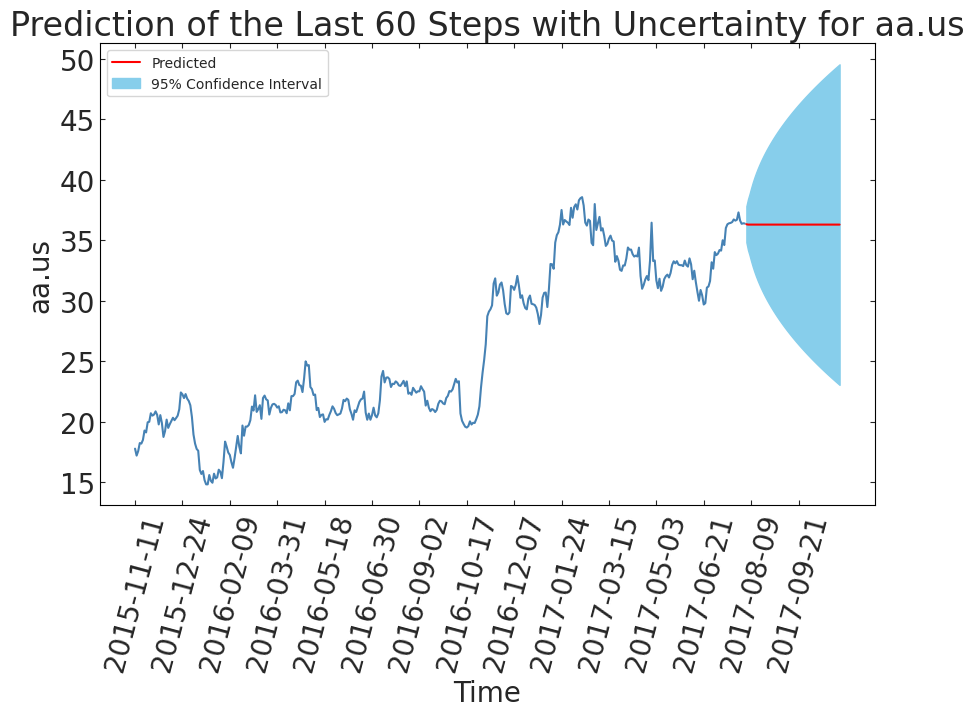

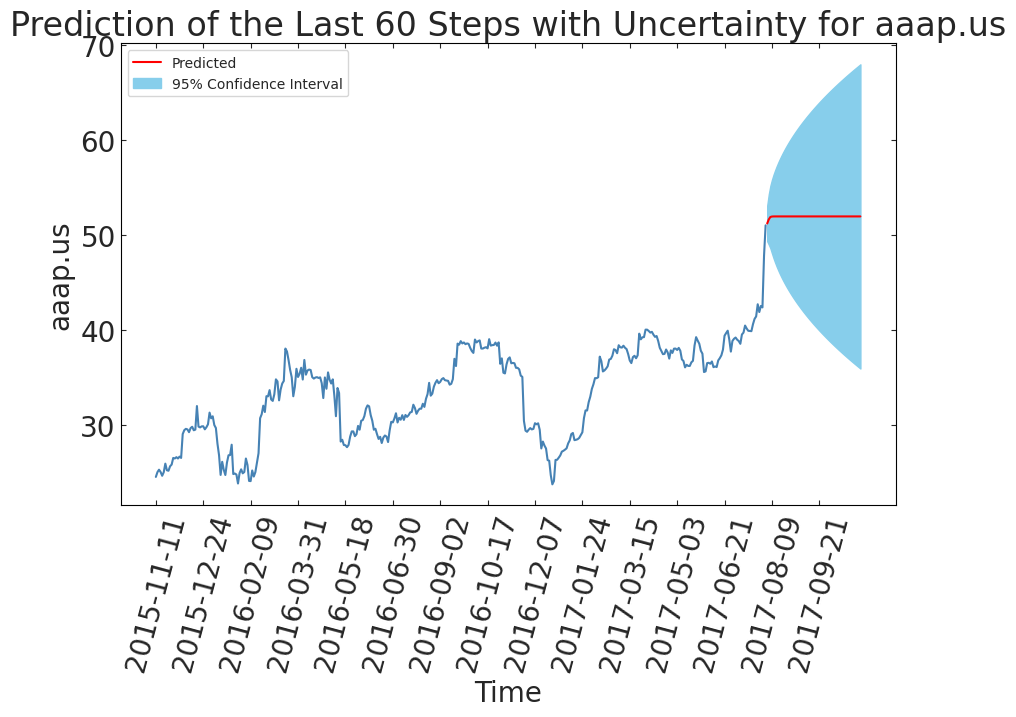

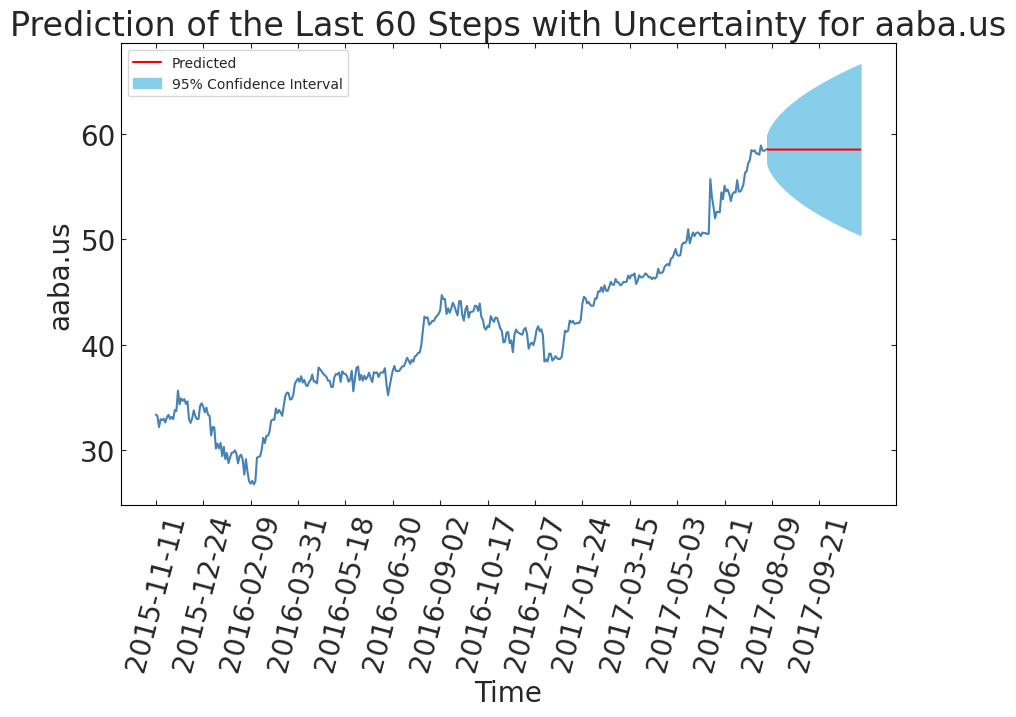

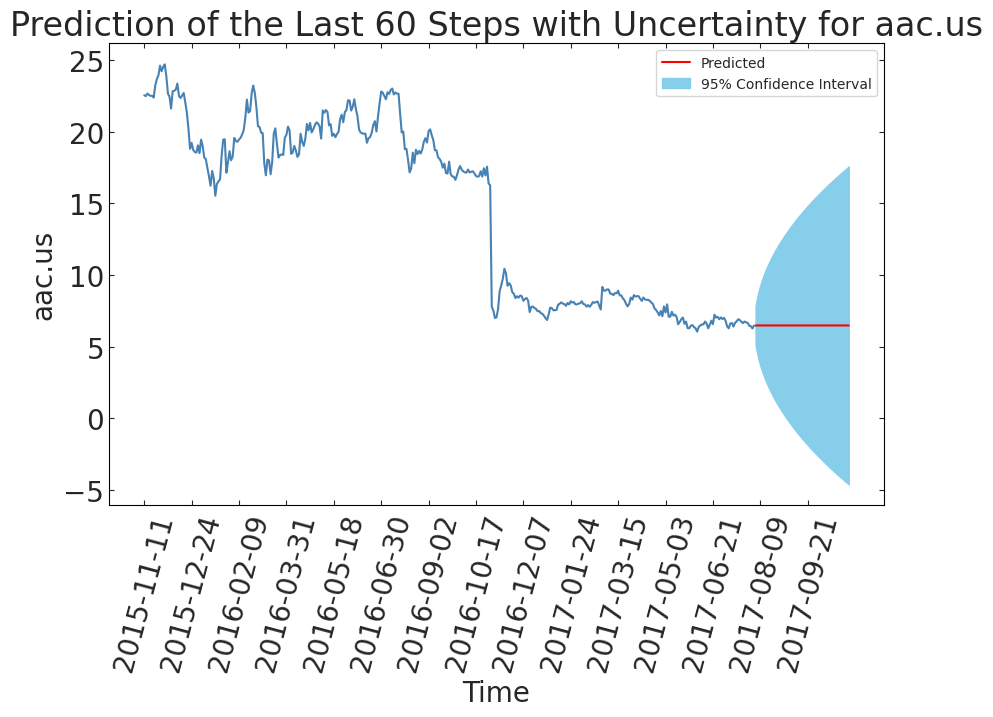

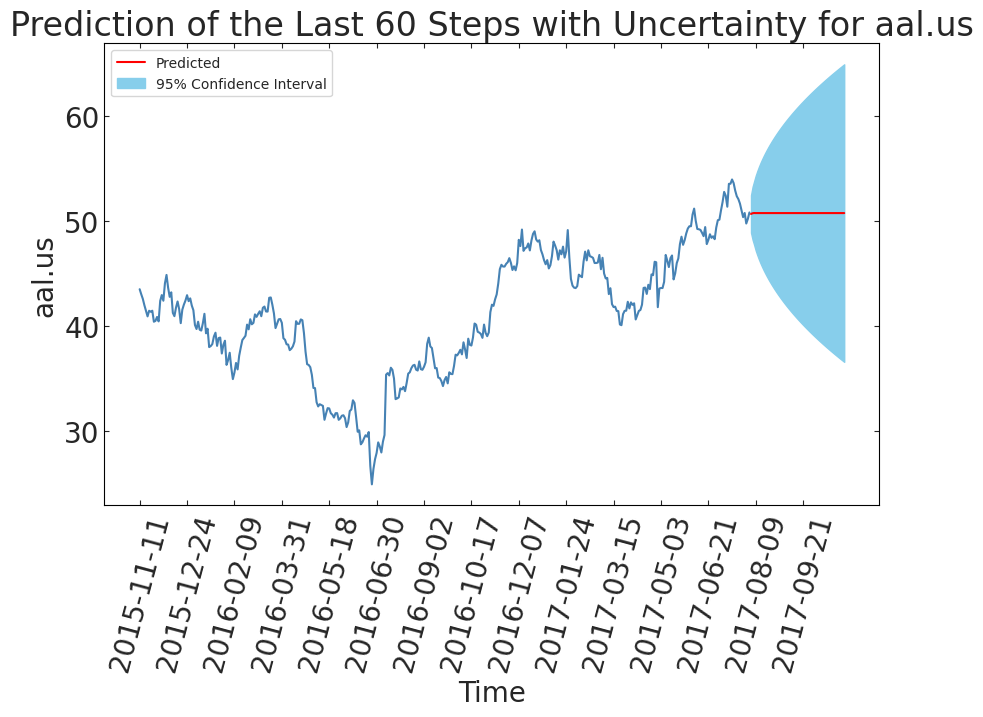

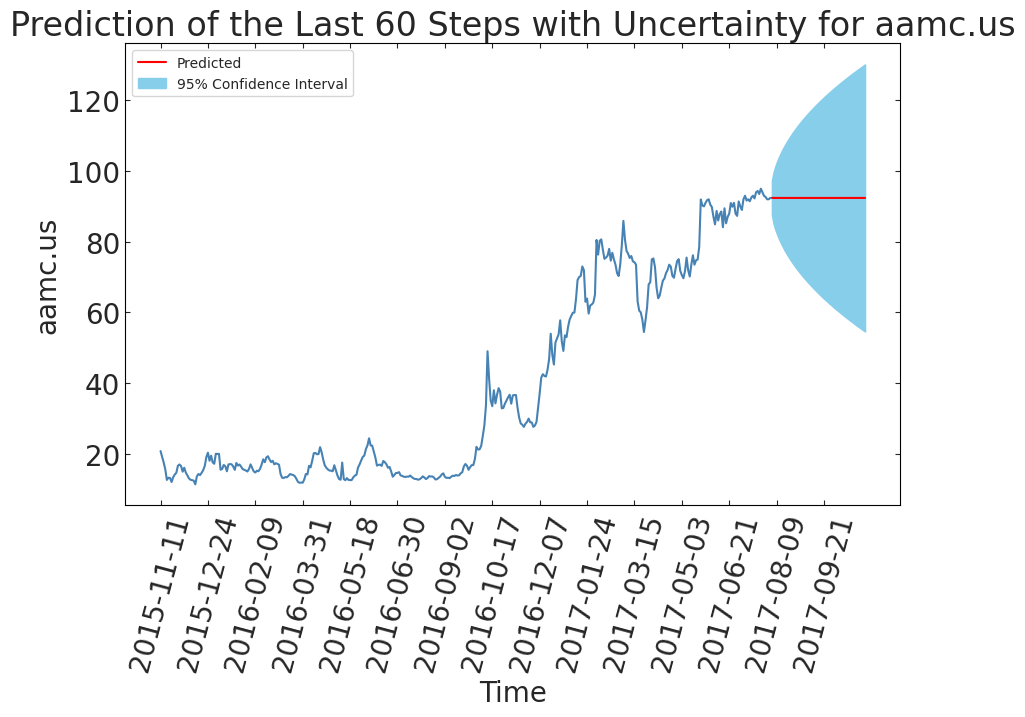

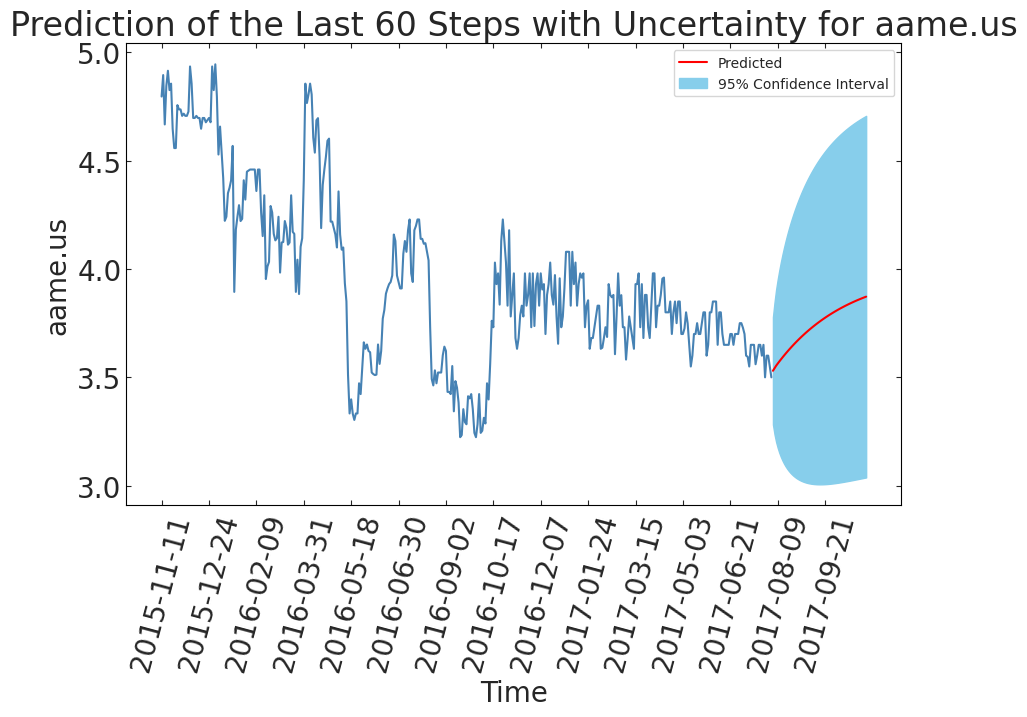

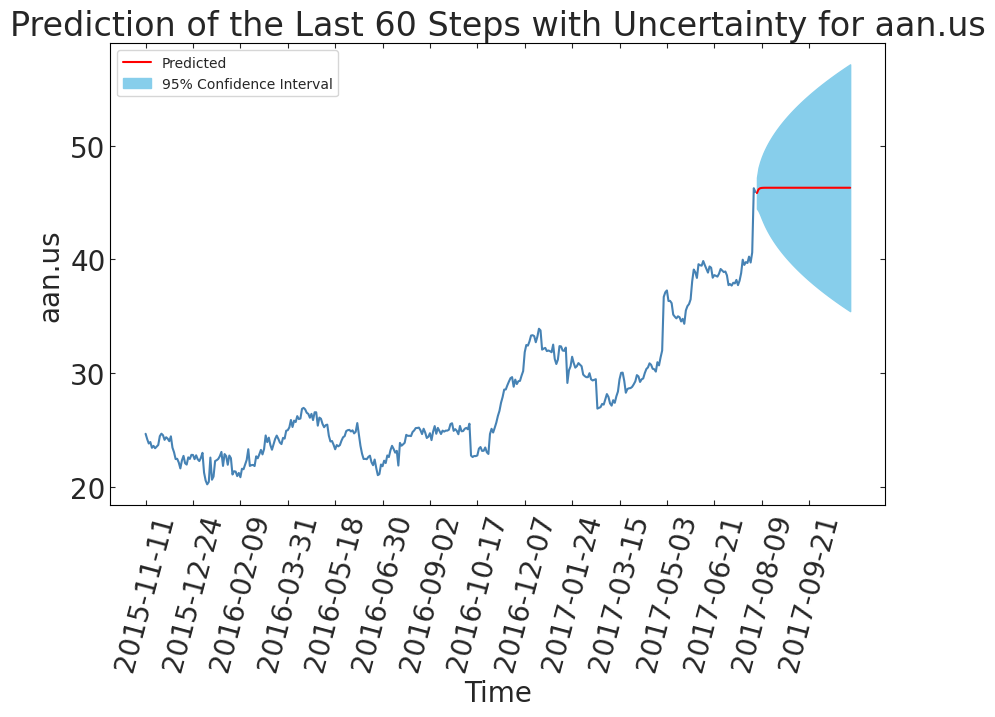

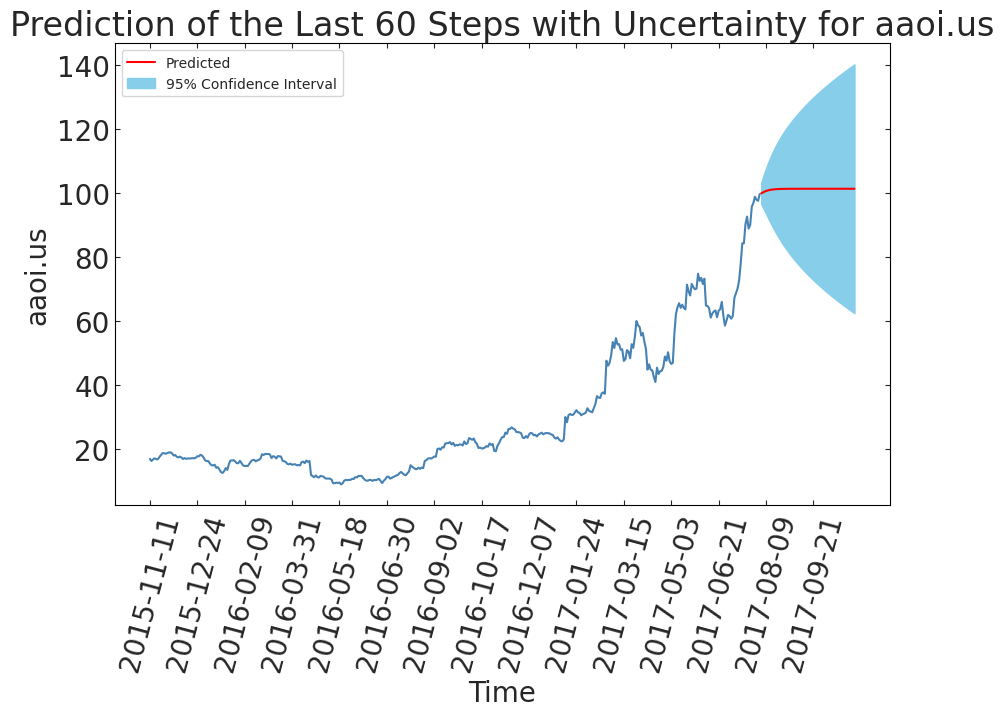

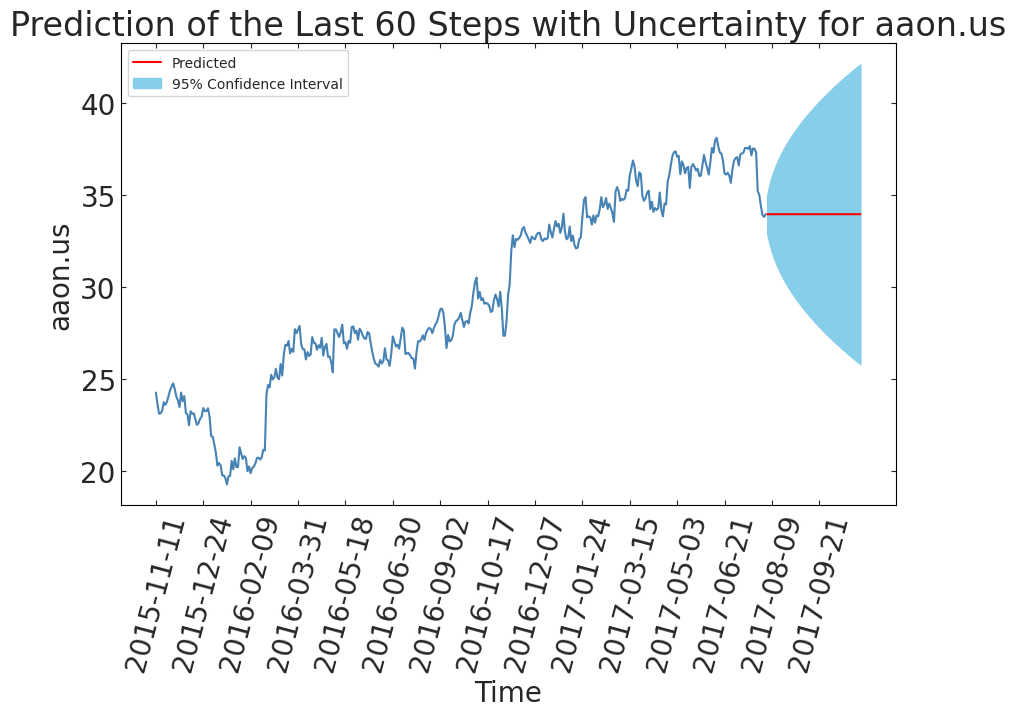

In [51]:
for i in range(len(tss.columns)):
    plt.plot(tss.iloc[:-60].index, tss.iloc[:-60][tss.columns[i]])#, rot=75, lw=2)

    forecast = model_fit[i].get_forecast(60)
    yhat = forecast.predicted_mean
    yhat_conf_int = forecast.conf_int(alpha=0.05)

    # Plot the predictions with uncertainty
    plt.plot(tss.iloc[-60:].index, yhat, label="Predicted", color="red")
    plt.fill_between(tss.iloc[-60:].index,  yhat_conf_int["lower " + tss.columns[i]],
                    yhat_conf_int["upper " + tss.columns[i]],
                    color="skyblue",
                    label="95% Confidence Interval")
    plt.xticks(tss.index[::30], rotation=75)
    plt.xlabel("Time")
    plt.ylabel(f"{tss.columns[i]}")
    plt.title(f"Prediction of the Last 60 Steps with Uncertainty for {tss.columns[i]}")
    plt.legend(fontsize=10)
    plt.show()

FIG 5: WRITE A CAPTION (for each time series make a figure)

This figure presents the prediction of the last 60 steps for the time series data of stocks, utilizing an ARIMA model. The blue-shaded area represents the 95% confidence interval, illustrating the uncertainty in future predictions. The red line shows the predicted values, while the historical data is plotted in blue. The widening confidence interval indicates increasing uncertainty as the forecast horizon extends further into the future. For aame.us stock prediction curve is going upward and not staight, this might be impact of second parameter i=0 as it is stationarity. Apart from this major difference in all of the curve is confidance region size.